In [58]:
# importing dependancies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [12]:
data = pd.read_csv("sonar.all-data.csv")

In [13]:
data.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [14]:
data.shape

(208, 61)

In [15]:
data.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [16]:
data['Label'].value_counts()

Label
M    111
R     97
Name: count, dtype: int64

In [17]:
data.groupby('Label').mean()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
Label,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [18]:
x = data.drop(columns = "Label", axis=1)
y = data['Label']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=1, stratify=y)

# Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
x_train_prediction = lr.predict(x_train)
training_accuracy = accuracy_score(x_train_prediction, y_train)
print("training_accuracy : ",training_accuracy)

training_accuracy :  0.8342245989304813


In [38]:
x_test_prediction = lr.predict(x_test)
testing_accuracy = accuracy_score(x_test_prediction, y_test)
print("testing_accuracy : ",testing_accuracy)

testing_accuracy :  0.7619047619047619


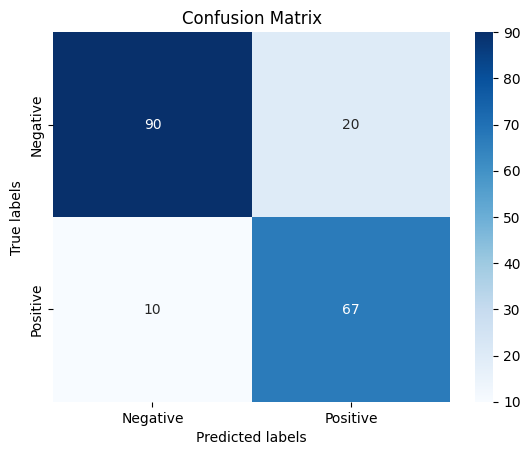

In [62]:
# Create confusion matrix
cm = confusion_matrix(x_train_prediction,y_train)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

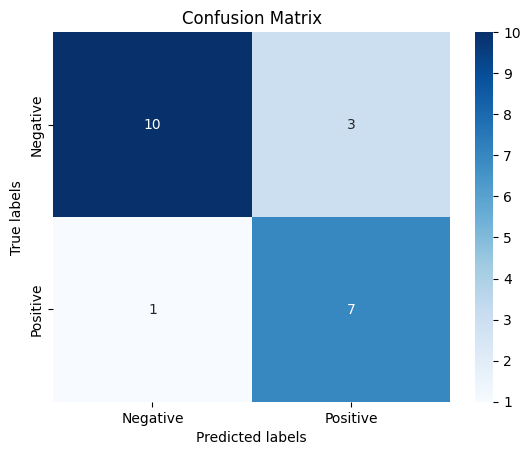

In [67]:
# Create confusion matrix
cm = confusion_matrix(x_test_prediction,y_test)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
x_train_prediction = rf.predict(x_train)
training_accuracy = accuracy_score(x_train_prediction, y_train)
print("training_accuracy : ",training_accuracy)

training_accuracy :  1.0


In [40]:
x_test_prediction = lr.predict(x_test)
testing_accuracy = accuracy_score(x_test_prediction, y_test)
print("testing_accuracy : ",testing_accuracy)

testing_accuracy :  0.7619047619047619


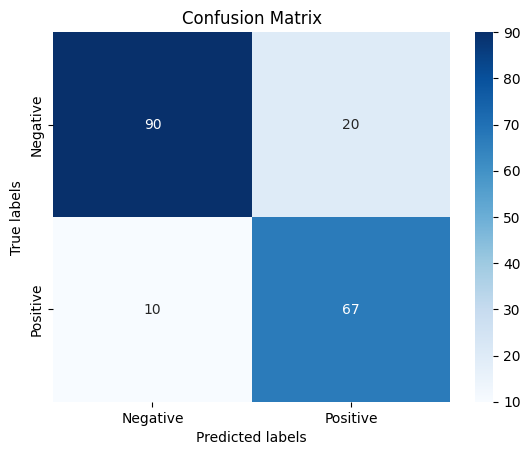

In [63]:
# Create confusion matrix
cm = confusion_matrix(x_train_prediction,y_train)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Naive bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [42]:
x_train_prediction = nb.predict(x_train)
training_accuracy = accuracy_score(x_train_prediction, y_train)
print("training_accuracy : ",training_accuracy)

training_accuracy :  0.7593582887700535


In [43]:
x_test_prediction = nb.predict(x_test)
testing_accuracy = accuracy_score(x_test_prediction, y_test)
print("testing_accuracy : ",testing_accuracy)

testing_accuracy :  0.6190476190476191


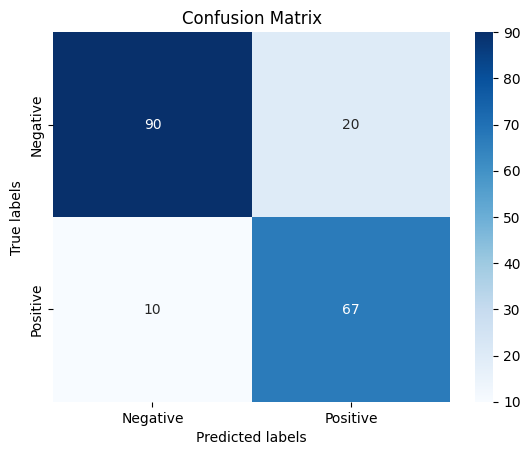

In [64]:
# Create confusion matrix
cm = confusion_matrix(x_train_prediction,y_train)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# support vector

In [45]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [46]:
x_train_prediction = sv.predict(x_train)
training_accuracy = accuracy_score(x_train_prediction, y_train)
print("training_accuracy : ",training_accuracy)

training_accuracy :  0.8823529411764706


In [47]:
x_test_prediction = sv.predict(x_test)
testing_accuracy = accuracy_score(x_test_prediction, y_test)
print("testing_accuracy : ",testing_accuracy)

testing_accuracy :  0.8095238095238095


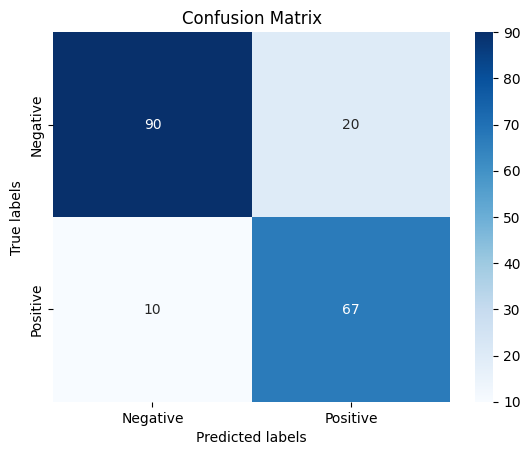

In [65]:
# Create confusion matrix
cm = confusion_matrix(x_train_prediction,y_train)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [49]:
x_train_prediction = kn.predict(x_train)
training_accuracy = accuracy_score(x_train_prediction, y_train)
print("training_accuracy : ",training_accuracy)

training_accuracy :  0.839572192513369


In [50]:
x_test_prediction = kn.predict(x_test)
testing_accuracy = accuracy_score(x_test_prediction, y_test)
print("testing_accuracy : ",testing_accuracy)

testing_accuracy :  0.8095238095238095


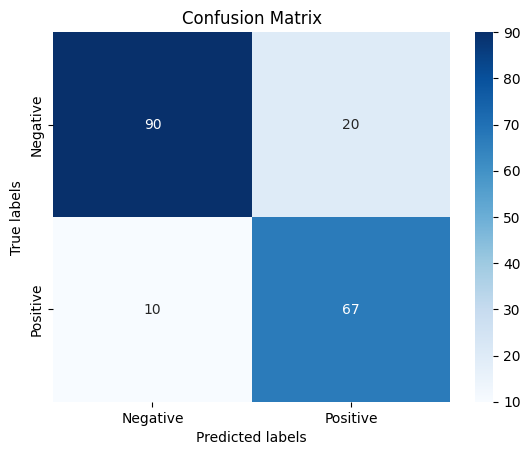

In [66]:
# Create confusion matrix
cm = confusion_matrix(x_train_prediction,y_train)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# final predictive system

In [54]:
input_data = (0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032)
data_array = np.asarray(input_data)
data_reshape = data_array.reshape(1,-1)
prediction = rf.predict(data_reshape)
# print(prediction)
if prediction == ['R']:
    print("underwater target is rock")
elif prediction == ['M']:
    print("underwater target is mine")

underwater target is rock


C:\Users\swaraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [56]:
# serilizing the model
import joblib
joblib.dump(rf,open('rock_mine_rf.pkl','wb'))